In [ ]:
!pip install ucimlrepo

#Download IRIS dataset & convert it to CSV

In [ ]:
import requests
import pandas as pd
from io import StringIO


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url)
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = StringIO(response.text)
iris_df = pd.read_csv(data, names=column_names)

print(iris_df.head())

iris_df.to_csv('iris_dataset.csv', index=False)

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


#Read CSV file and show info of the data

In [ ]:
import pandas as pd
csv_file_path = 'iris_dataset.csv'
iris_df = pd.read_csv(csv_file_path)
print(iris_df.head())
print(iris_df.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
#Describe the data
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Train test splitting ,label encoding the speices(target) column

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time

le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df['species'])

X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (120, 4)
Test features shape: (30, 4)
Training target shape: (120,)
Test target shape: (30,)


##Importing the model(Decision Tree), training, testing, printing accuray parameters and measure total time taken to fit and predict the model

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Set Accuracy: 93.33%


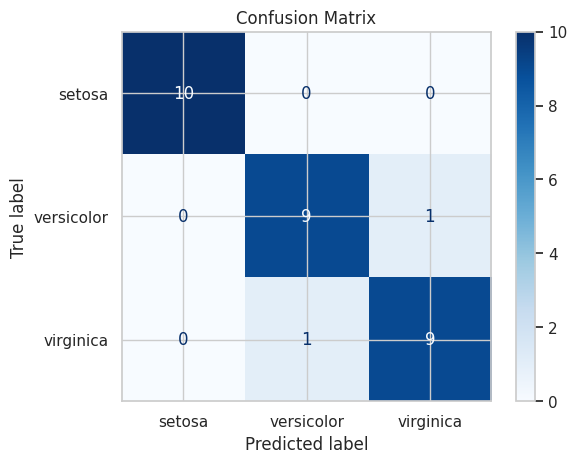


Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



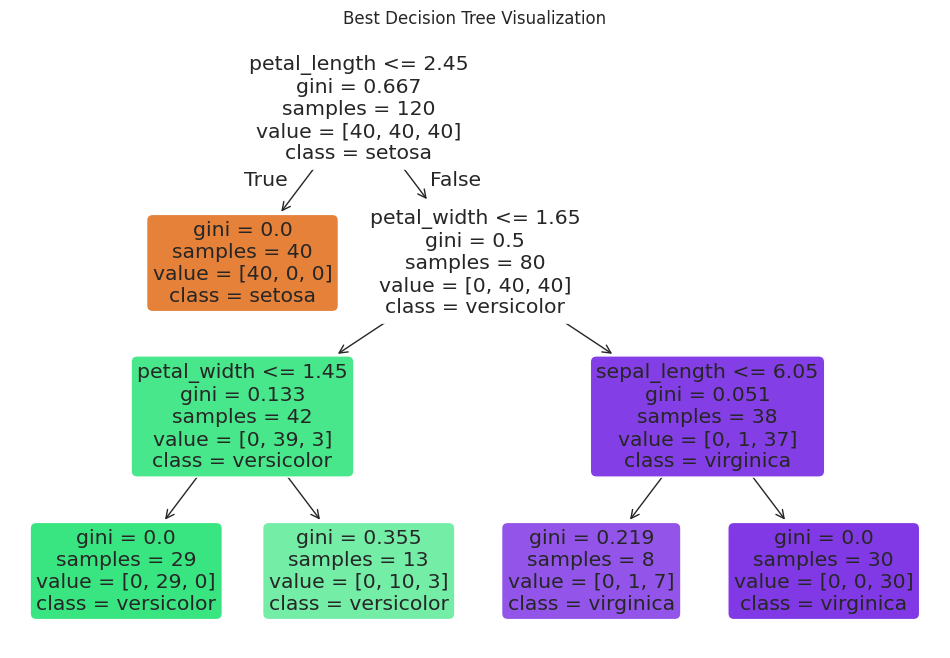


Time taken for training and tuning: 5389.4699 ms


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,  classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import time
import plotly.express as px
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Create a base DecisionTreeClassifier
dt_base = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_base,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,  # Use all processors
                           verbose=1)

# Start timing
start_time = time.time()

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# End timing
end_time = time.time()
time_taken = (end_time - start_time) * 1000  # in ms

# Get best model from grid search
best_dt = grid_search.best_estimator_

# Predict using the best model (Test set)
y_pred_test = best_dt.predict(X_test)

# Evaluate the model (Test)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Evaluate the model (Train)

class_report = classification_report(y_test, y_pred_test)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        display_labels=['setosa', 'versicolor', 'virginica'],
                                        cmap='Blues')
plt.title(f'Confusion Matrix')
plt.show()

print("\nClassification Report (Test):")
print(class_report)

# Visualize the best decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt,
          filled=True,
          feature_names=X.columns,
          class_names=['setosa', 'versicolor', 'virginica'],
          rounded=True)
plt.title("Best Decision Tree Visualization")
plt.show()

print(f"\nTime taken for training and tuning: {time_taken:.4f} ms")


#Plotting mean accuracy Table for various parameters in decision tree

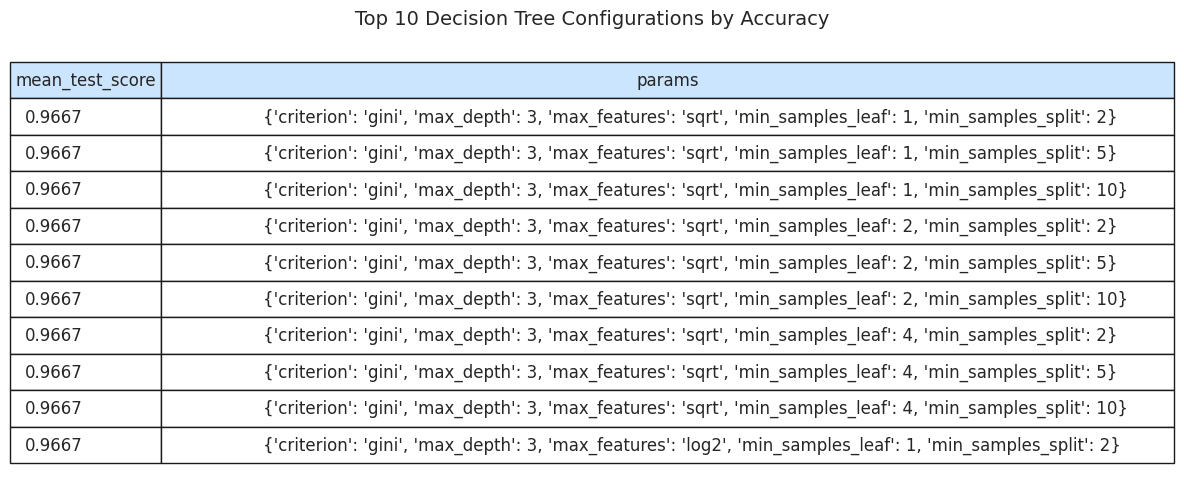

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Use Seaborn style
sns.set(style="whitegrid")
# Extract and sort top results
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Show top N results
top_n = 10
top_results = results_df.head(top_n)[['mean_test_score', 'params']]
top_results.reset_index(drop=True, inplace=True)
top_results['mean_test_score'] = top_results['mean_test_score'].apply(lambda x: f"{x:.4f}")
# Create the table plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')  # Remove axes
# Create table
table = plt.table(cellText=top_results.values,
                  colLabels=top_results.columns,
                  cellLoc='left',
                  loc='center',
                  colColours=['#cce5ff', '#cce5ff'])  # Light blue header
# Set font size and cell height
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # Make rows taller
# Manually adjust column widths
# Narrow the first column (mean_test_score), leave second wider
for (row, col), cell in table.get_celld().items():
    if col == 0:  # mean_test_score
        cell.set_width(0.13)
    elif col == 1:  # params
        cell.set_width(0.87)
# Add title
plt.title(f"Top {top_n} Decision Tree Configurations by Accuracy", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


##Importing the model(Gaussian Naive Bayes), training, testing, printing accuray parameters and measure total time taken to fit and predict the model



--- Best Model Details ---
Best var_smoothing: 1e-09
Test Accuracy: 96.67%


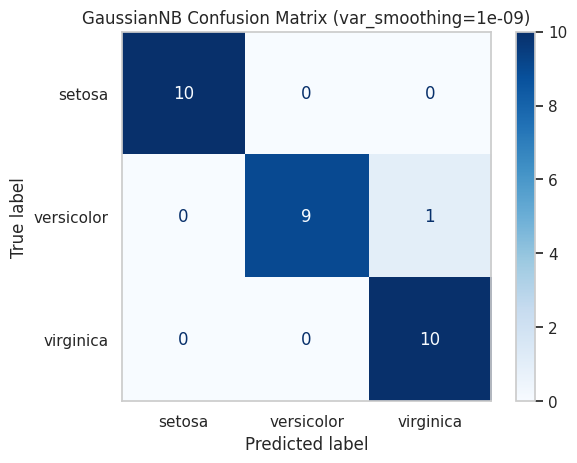


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import time

# Typical var_smoothing values for GaussianNB (very small values)
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6]

# To store results for summary table
results = []

def train_and_evaluate(nb_classifier, X_train, y_train, X_test, y_test):
    start_time = time.time()
    nb_classifier.fit(X_train, y_train)

    y_pred_train = nb_classifier.predict(X_train)
    y_pred_test = nb_classifier.predict(X_test)

    end_time = time.time()

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    time_taken_ms = (end_time - start_time) * 1000

    return train_accuracy, test_accuracy, time_taken_ms, y_pred_test

best_test_accuracy = 0
best_model = None
best_var_smoothing = None
best_y_pred_test = None

for var_smoothing in var_smoothing_values:
    gnb = GaussianNB(var_smoothing=var_smoothing)
    train_acc, test_acc, elapsed_time, y_pred_test = train_and_evaluate(gnb, X_train, y_train, X_test, y_test)
    results.append({
        "var_smoothing": var_smoothing,
        "train_accuracy": train_acc,
        "test_accuracy": test_acc,
        "time_ms": elapsed_time
    })

    # Track best model
    if test_acc > best_test_accuracy:
        best_test_accuracy = test_acc
        best_model = gnb
        best_var_smoothing = var_smoothing
        best_y_pred_test = y_pred_test

# Detailed evaluation of best model
print(f"\n\n--- Best Model Details ---")
print(f"Best var_smoothing: {best_var_smoothing}")
print(f"Test Accuracy: {best_test_accuracy * 100:.2f}%")

# Confusion matrix and classification report for best model
conf_matrix = confusion_matrix(y_test, best_y_pred_test)
class_report = classification_report(y_test, best_y_pred_test, zero_division=0)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['setosa', 'versicolor', 'virginica'])
disp.plot(cmap='Blues')
plt.title(f"GaussianNB Confusion Matrix (var_smoothing={best_var_smoothing})")
plt.grid(False)
plt.show()

print("\nClassification Report:")
print(class_report)


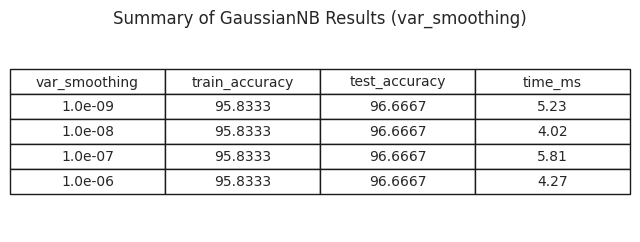

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# After collecting results into `results` list:

df_results = pd.DataFrame(results)

# Format var_smoothing in scientific notation string format for display
df_results_display = df_results.copy()
df_results_display['var_smoothing'] = df_results_display['var_smoothing'].apply(lambda x: f"{x:.1e}")
df_results_display['train_accuracy'] = df_results_display['train_accuracy'] * 100
df_results_display['test_accuracy'] = df_results_display['test_accuracy'] * 100
df_results_display['time_ms'] = df_results_display['time_ms'].round(2)

plt.figure(figsize=(8, 1 + 0.4 * len(df_results)))  # height grows with rows
plt.title("Summary of GaussianNB Results (var_smoothing)")

table = plt.table(cellText=df_results_display.round(4).values,
                  colLabels=df_results_display.columns,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.axis('off')
plt.show()


##Importing the model(Bernoulli Naive Bayes), training, testing, printing accuray parameters and measure total time taken to fit and predict the model

Best parameters for BernoulliNB: {'alpha': 0.001, 'binarize': 0.05, 'fit_prior': True}
BernoulliNB (best parameters) Test Accuracy: 73.33%

BernoulliNB Confusion Matrix:


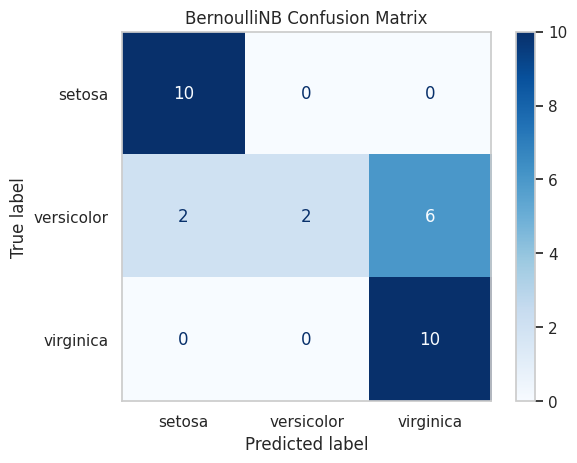


BernoulliNB Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.20      0.33        10
           2       0.62      1.00      0.77        10

    accuracy                           0.73        30
   macro avg       0.82      0.73      0.67        30
weighted avg       0.82      0.73      0.67        30

Time taken for training and tuning: 2604.7769 ms


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Apply StandardScaler for better scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.1],  # Laplace smoothing
    'binarize': [0.05, 0.1, 0.15, 0.2],        # Thresholds for binarization
    'fit_prior': [True, False],                 # Use prior probabilities or not
}

# Initialize BernoulliNB
bnb = BernoulliNB()

start_time = time.time()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best estimator
best_params = grid_search.best_params_
print(f"Best parameters for BernoulliNB: {best_params}")
best_bnb = grid_search.best_estimator_

# Predict on test data
y_pred_test = best_bnb.predict(X_test_scaled)

end_time = time.time()
time_taken_ms = (end_time - start_time) * 1000

# Evaluate the model (test only)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print(f"BernoulliNB (best parameters) Test Accuracy: {test_accuracy * 100:.2f}%")

# Since train accuracy removed, skip overfitting check

print("\nBernoulliNB Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['setosa', 'versicolor', 'virginica'])
disp.plot(cmap='Blues')
plt.title("BernoulliNB Confusion Matrix")
plt.grid(False)
plt.show()

print("\nBernoulliNB Classification Report:")
print(class_report)

print(f"Time taken for training and tuning: {time_taken_ms:.4f} ms")



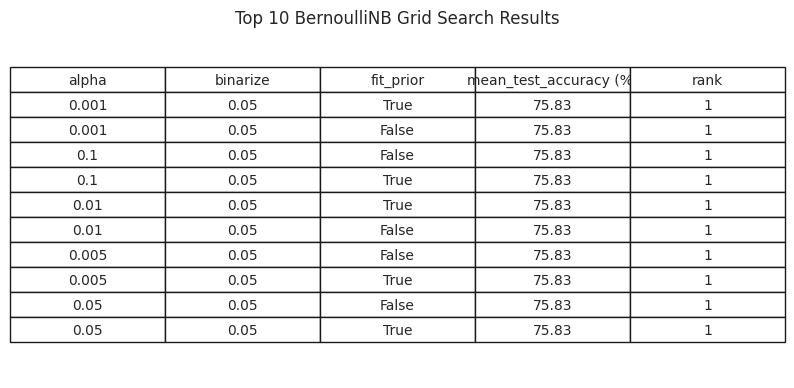

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Extract GridSearchCV results
cv_results = grid_search.cv_results_
# Create a DataFrame with selected columns
results_df = pd.DataFrame({
    'alpha': cv_results['param_alpha'],
    'binarize': cv_results['param_binarize'],
    'fit_prior': cv_results['param_fit_prior'],
    'mean_test_accuracy (%)': cv_results['mean_test_score'] * 100,
    'rank': cv_results['rank_test_score']
})
# Sort by best performance
results_df = results_df.sort_values(by='mean_test_accuracy (%)', ascending=False).reset_index(drop=True)
# Round for display
results_df_display = results_df.copy()
results_df_display['mean_test_accuracy (%)'] = results_df_display['mean_test_accuracy (%)'].round(2)
# Limit to top 10
top_10_results = results_df_display.head(10)
# Plot as a table
plt.figure(figsize=(10, 0.5 + 0.4 * len(top_10_results)))  # auto height
plt.title("Top 10 BernoulliNB Grid Search Results")
table = plt.table(cellText=top_10_results.values,
                  colLabels=top_10_results.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.axis('off')
plt.show()

##Importing the model(Multinomial Naive Bayes), training, testing, printing accuray parameters and measure total time taken to fit and predict the model

Best alpha parameter: 1
Test Set Accuracy: 83.33%

Confusion Matrix:


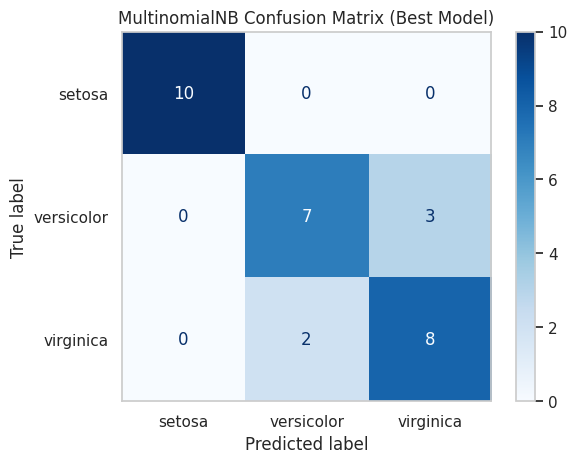


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      0.70      0.74        10
           2       0.73      0.80      0.76        10

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30


Time taken for training and tuning: 2770.1128 ms


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

# Scale X_train and X_test to ensure non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MultinomialNB classifier
mnb = MultinomialNB()

# Set up parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model with hyperparameter tuning
start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

# Best model from GridSearchCV
best_mnb = grid_search.best_estimator_

# Predict on the test data
y_pred_test = best_mnb.predict(X_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test, zero_division=0)

# Print best params and results
print(f"Best alpha parameter: {grid_search.best_params_['alpha']}")
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['setosa', 'versicolor', 'virginica'])
disp.plot(cmap='Blues')
plt.title("MultinomialNB Confusion Matrix (Best Model)")
plt.grid(False)
plt.show()

print("\nClassification Report:")
print(class_report)

time_taken_ms = (end_time - start_time) * 1000
print(f"\nTime taken for training and tuning: {time_taken_ms:.4f} ms")


##Plotting Table for MultinomialNB for different parameters

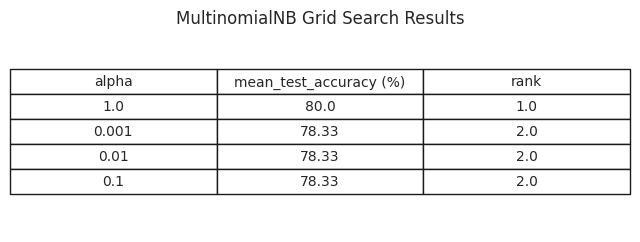

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract cv_results from GridSearchCV
cv_results = grid_search.cv_results_

# Create a DataFrame with relevant information
results_df = pd.DataFrame({
    'alpha': cv_results['param_alpha'],
    'mean_test_accuracy (%)': cv_results['mean_test_score'] * 100,
    'rank': cv_results['rank_test_score']
})

# Sort by best accuracy
results_df = results_df.sort_values(by='mean_test_accuracy (%)', ascending=False).reset_index(drop=True)

# Round for clean display
results_df_display = results_df.copy()
results_df_display['mean_test_accuracy (%)'] = results_df_display['mean_test_accuracy (%)'].round(2)

# Plot the table
plt.figure(figsize=(8, 1 + 0.4 * len(results_df_display)))
plt.title("MultinomialNB Grid Search Results")

table = plt.table(cellText=results_df_display.values,
                  colLabels=results_df_display.columns,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.axis('off')
plt.show()

On evaluating different classification algorithms on the Iris dataset, we observe notable differences in performance that stem largely from the nature of the dataset and the assumptions made by each model. The Iris dataset comprises 150 samples with 4 continuous numerical features and 3 distinct classes representing species of iris flowers. Due to its balanced structure and well-separated classes, it is often used as a benchmark for testing classification models.

- The Decision Tree classifier performed well, achieving a test accuracy of 93.33% with an optimal parameter configuration including criterion='gini', max_depth=3, and max_features='sqrt'. The model provided balanced precision, recall, and F1-scores across all classes. Its interpretability makes it especially useful when understanding the model's decisions is important. However, the limited depth, while helping to prevent overfitting, may slightly reduce its ability to capture complex class boundaries in some cases.

- The Gaussian Naive Bayes (GaussianNB) model emerged as the most effective, with a test accuracy of 96.67% and a macro-averaged F1-score of 0.97. It leveraged the assumption that features follow a Gaussian distribution—a reasonable assumption for the Iris dataset’s continuous features. Its performance was particularly strong due to its simplicity, low computational cost, and suitability for small, well-structured datasets. GaussianNB also demonstrated high class-wise precision and recall, particularly excelling in correctly classifying all instances of class 0 and achieving near-perfect scores for the other two classes.

- In contrast, the Bernoulli Naive Bayes (BernoulliNB) model performed poorly, with an accuracy of only 73.33% and a macro F1-score of 0.67. Designed primarily for binary feature inputs, BernoulliNB is not well-suited for continuous data like that in the Iris dataset. Even with appropriate binarization and hyperparameter tuning (alpha=0.001, binarize=0.05), it struggled particularly with class 1, showing a recall of just 0.20. This highlights the limitations of applying a model built for binary input to real-valued features.

- The Multinomial Naive Bayes (MultinomialNB) model offered moderate performance, achieving a test accuracy of 83.33%. Although better than BernoulliNB, it was noticeably behind GaussianNB and Decision Tree. MultinomialNB assumes discrete count-based features (like word frequencies), which misaligns with the real-valued, continuous nature of the Iris dataset. While it handled class 0 perfectly, it showed slightly weaker recall and precision for classes 1 and 2.

In conclusion, GaussianNB proved to be the most effective model for the Iris dataset, thanks to its compatibility with continuous data and minimal training complexity. Decision Trees also performed robustly and offer the added benefit of interpretability. In contrast, both BernoulliNB and MultinomialNB underperformed due to their assumptions about input feature types, which do not align well with the characteristics of the Iris dataset. This analysis reinforces the importance of selecting models that align with the data's structure and distribution.

#Download Breast Cancer dataset & convert it to CSV

In [ ]:
!pip install ucimlrepo
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract features and targets
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Combine features and targets into a single DataFrame
df2 = pd.concat([X, y], axis=1)

# Save the combined DataFrame to a CSV file
df2.to_csv('breast_cancer_wisconsin.csv', index=False)

print("Dataset successfully converted and saved to 'breast_cancer_wisconsin.csv'")

Dataset successfully converted and saved to 'breast_cancer_wisconsin.csv'


In [ ]:
df2.sample(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,35.27,108.60,906.5,0.1265,0.1943,0.3169,0.11840,0.2651,0.07397,M
515,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,...,23.03,79.15,478.6,0.1483,0.1574,0.1624,0.08542,0.3060,0.06783,B
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,27.26,139.90,1403.0,0.1338,0.2117,0.3446,0.14900,0.2341,0.07421,M
301,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,23.07,88.13,551.3,0.1050,0.2158,0.1904,0.07625,0.2685,0.07764,B
128,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,...,18.33,105.90,762.6,0.1386,0.2883,0.1960,0.14230,0.2590,0.07779,B


In [ ]:
df2.describe()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

#Importing the model(Decision Tree), training, testing, printing accuray parameters and measure total time taken to fit and predict the model

Best parameters from GridSearchCV: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Set Accuracy: 96.49%

Confusion Matrix:


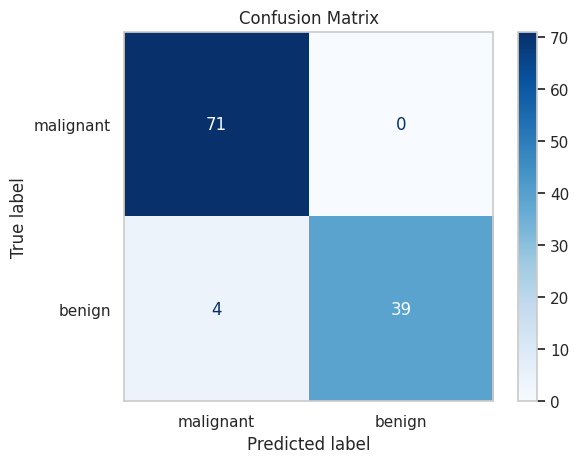


Classification Report:
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        71
           M       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC: 0.9715034392400917


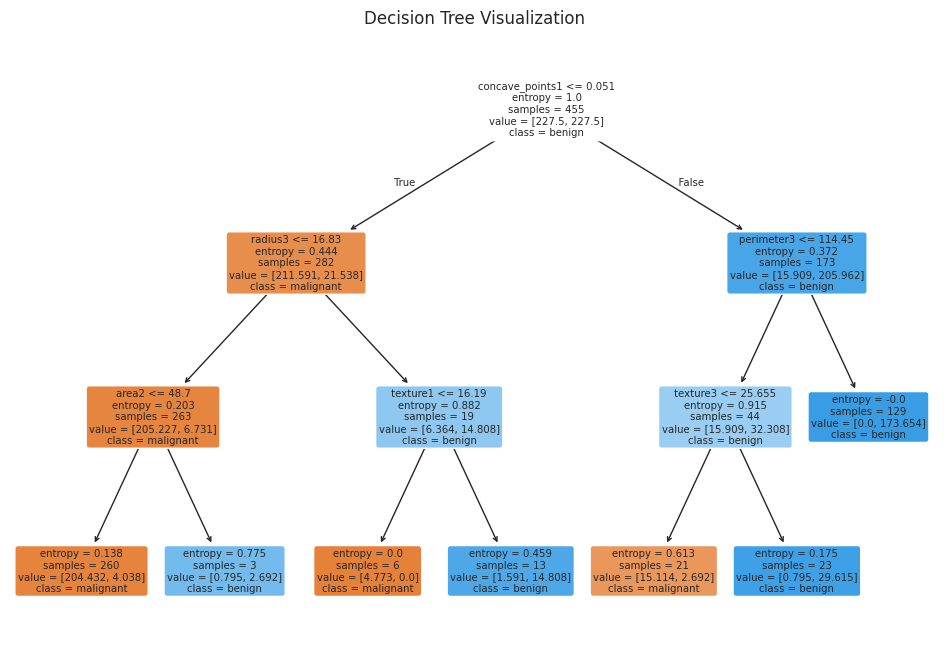


Time taken for GridSearchCV, training and prediction: 10177.6633 ms


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

X = df2.drop(columns=['Diagnosis'])
y = df2['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier without parameters for GridSearch
dt_classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced', criterion='entropy')

# Parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

# Use the best estimator for predictions
best_dt = grid_search.best_estimator_

y_pred_test = best_dt.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['malignant', 'benign'])
disp.plot(cmap='Blues')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

print("ROC-AUC:", roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1]))

plt.figure(figsize=(12, 8))
plot_tree(best_dt,
          filled=True,
          feature_names=X.columns,
          class_names=['malignant', 'benign'],
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

time_taken_ms = (end_time - start_time) * 1000
print(f"\nTime taken for GridSearchCV, training and prediction: {time_taken_ms:.4f} ms")


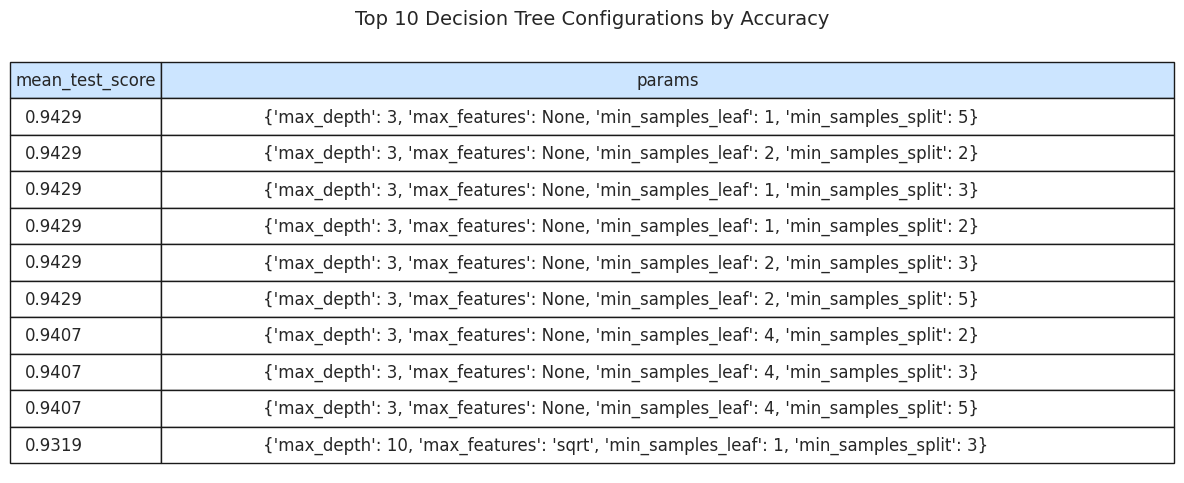

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn style
sns.set(style="whitegrid")

# Extract and sort top results
results_df = pd.DataFrame(grid_search.cv_results_)

results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Show top N results
top_n = 10
top_results = results_df.head(top_n)[['mean_test_score', 'params']]
top_results.reset_index(drop=True, inplace=True)
top_results['mean_test_score'] = top_results['mean_test_score'].apply(lambda x: f"{x:.4f}")

# Create the table plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')  # Remove axes

# Create table
table = plt.table(cellText=top_results.values,
                 colLabels=top_results.columns,
                 cellLoc='left',
                 loc='center',
                 colColours=['#cce5ff', '#cce5ff'])  # Light blue header

# Set font size and cell height
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # Make rows taller

# Manually adjust column widths
# Narrow the first column (mean_test_score), leave second wider
for (row, col), cell in table.get_celld().items():
    if col == 0:  # mean_test_score
        cell.set_width(0.13)
    elif col == 1:  # params
        cell.set_width(0.87)

# Add title
plt.title(f"Top {top_n} Decision Tree Configurations by Accuracy", fontsize=14, pad=20)

plt.tight_layout()
plt.show()


##Importing the model(Gaussian Naive Bayes), training, testing, printing accuray parameters and measure total time taken to fit and predict the model

Best var_smoothing parameter: 1e-09

Test Set Accuracy: 97.37%

Confusion Matrix:


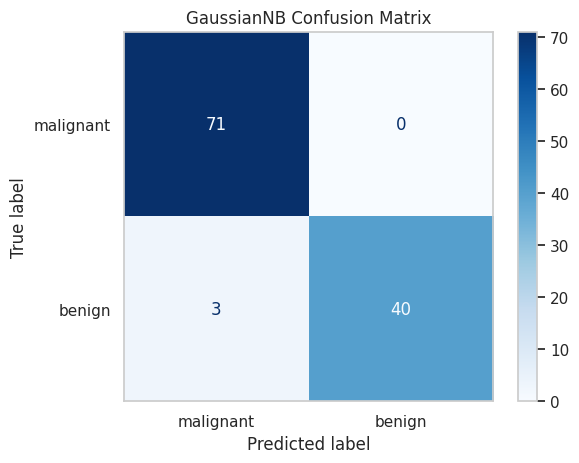


Classification Report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        71
           M       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Time taken for GridSearchCV, training and prediction: 138.1164 ms


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Parameter grid for var_smoothing
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

gnb = GaussianNB()

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

best_gnb = grid_search.best_estimator_

print(f"Best var_smoothing parameter: {grid_search.best_params_['var_smoothing']}")

# Predict on test data
y_pred_test = best_gnb.predict(X_test)

# Evaluate
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print(f"\nTest Set Accuracy: {test_accuracy * 100:.2f}%")

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['malignant', 'benign'])
disp.plot(cmap='Blues')
plt.grid(False)
plt.title("GaussianNB Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

time_taken_ms = (end_time - start_time) * 1000
print(f"\nTime taken for GridSearchCV, training and prediction: {time_taken_ms:.4f} ms")


##

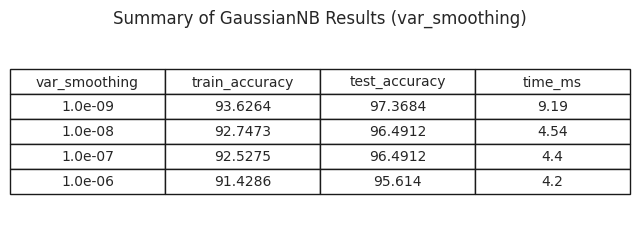

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# After collecting results into `results` list:

df_results = pd.DataFrame(results)

# Format var_smoothing in scientific notation string format for display
df_results_display = df_results.copy()
df_results_display['var_smoothing'] = df_results_display['var_smoothing'].apply(lambda x: f"{x:.1e}")
df_results_display['train_accuracy'] = df_results_display['train_accuracy'] * 100
df_results_display['test_accuracy'] = df_results_display['test_accuracy'] * 100
df_results_display['time_ms'] = df_results_display['time_ms'].round(2)

plt.figure(figsize=(8, 1 + 0.4 * len(df_results)))  # height grows with rows
plt.title("Summary of GaussianNB Results (var_smoothing)")

table = plt.table(cellText=df_results_display.round(4).values,
                  colLabels=df_results_display.columns,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.axis('off')
plt.show()


##Importing the model(Bernoulli Naive Bayes), training, testing, printing accuray parameters and measure total time taken to fit and predict the model

Best parameters: {'alpha': 0.001, 'binarize': 0.05, 'fit_prior': True}

Test Set Accuracy: 89.47%

Confusion Matrix:


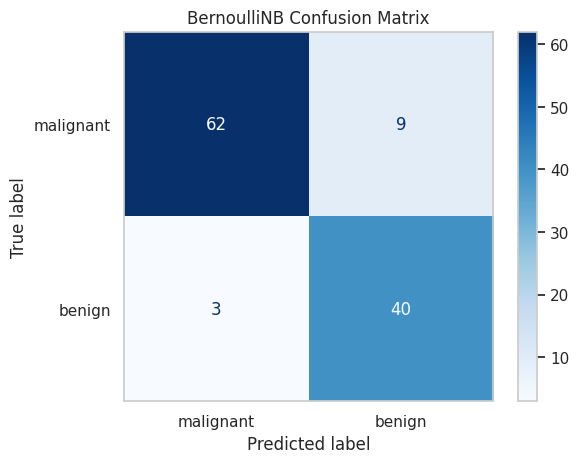


Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.87      0.91        71
           M       0.82      0.93      0.87        43

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114


Time taken for GridSearchCV, training and prediction: 849.2913 ms


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Define parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'binarize': [0.0, 0.05, 0.1, 0.15],
    'fit_prior': [True, False]
}

bnb = BernoulliNB()

grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

best_bnb = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")

# Predict on test data
y_pred_test = best_bnb.predict(X_test)

# Evaluate
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test, zero_division=0)

print(f"\nTest Set Accuracy: {test_accuracy * 100:.2f}%")

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['malignant', 'benign'])
disp.plot(cmap='Blues')
plt.grid(False)
plt.title("BernoulliNB Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

time_taken_ms = (end_time - start_time) * 1000
print(f"\nTime taken for GridSearchCV, training and prediction: {time_taken_ms:.4f} ms")


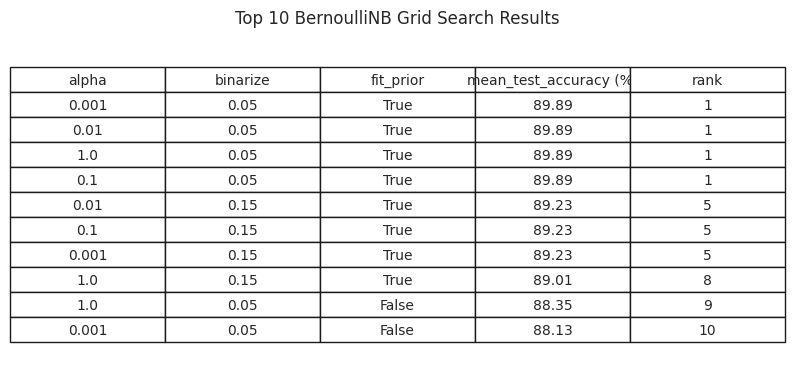

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Extract GridSearchCV results
cv_results = grid_search.cv_results_
# Create a DataFrame with selected columns
results_df = pd.DataFrame({
    'alpha': cv_results['param_alpha'],
    'binarize': cv_results['param_binarize'],
    'fit_prior': cv_results['param_fit_prior'],
    'mean_test_accuracy (%)': cv_results['mean_test_score'] * 100,
    'rank': cv_results['rank_test_score']
})
# Sort by best performance
results_df = results_df.sort_values(by='mean_test_accuracy (%)', ascending=False).reset_index(drop=True)
# Round for display
results_df_display = results_df.copy()
results_df_display['mean_test_accuracy (%)'] = results_df_display['mean_test_accuracy (%)'].round(2)
# Limit to top 10
top_10_results = results_df_display.head(10)
# Plot as a table
plt.figure(figsize=(10, 0.5 + 0.4 * len(top_10_results)))  # auto height
plt.title("Top 10 BernoulliNB Grid Search Results")
table = plt.table(cellText=top_10_results.values,
                  colLabels=top_10_results.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.axis('off')
plt.show()

##Importing the model(Multinomial Naive Bayes), training, testing, printing accuray parameters and measure total time taken to fit and predict the model


Best parameters: {'alpha': 0.001, 'fit_prior': True}

Test Set Accuracy: 93.86%

Confusion Matrix:


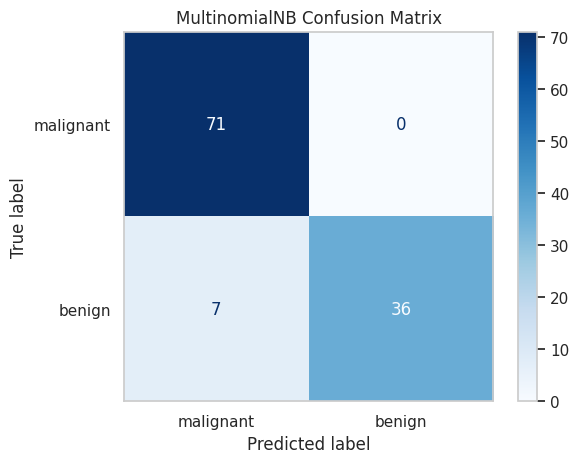


Classification Report:
              precision    recall  f1-score   support

           B       0.91      1.00      0.95        71
           M       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114


Time taken for GridSearchCV, training and prediction: 230.9201 ms


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'fit_prior': [True, False]
}

mnb = MultinomialNB()

grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

best_mnb = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")

# Predict on test data
y_pred_test = best_mnb.predict(X_test)

# Evaluate
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test, zero_division=0)

print(f"\nTest Set Accuracy: {test_accuracy * 100:.2f}%")

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['malignant', 'benign'])
disp.plot(cmap='Blues')
plt.grid(False)
plt.title("MultinomialNB Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

time_taken_ms = (end_time - start_time) * 1000
print(f"\nTime taken for GridSearchCV, training and prediction: {time_taken_ms:.4f} ms")

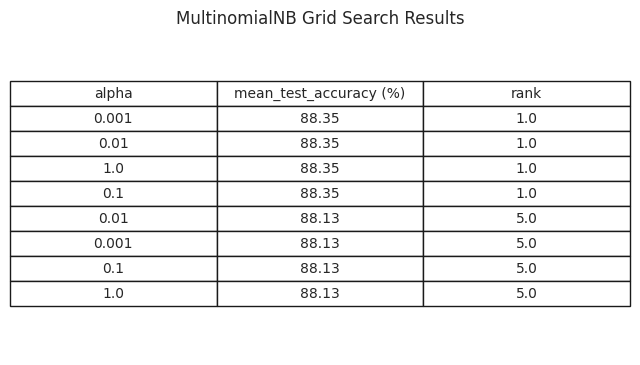

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract cv_results from GridSearchCV
cv_results = grid_search.cv_results_

# Create a DataFrame with relevant information
results_df = pd.DataFrame({
    'alpha': cv_results['param_alpha'],
    'mean_test_accuracy (%)': cv_results['mean_test_score'] * 100,
    'rank': cv_results['rank_test_score']
})

# Sort by best accuracy
results_df = results_df.sort_values(by='mean_test_accuracy (%)', ascending=False).reset_index(drop=True)

# Round for clean display
results_df_display = results_df.copy()
results_df_display['mean_test_accuracy (%)'] = results_df_display['mean_test_accuracy (%)'].round(2)

# Plot the table
plt.figure(figsize=(8, 1 + 0.4 * len(results_df_display)))
plt.title("MultinomialNB Grid Search Results")

table = plt.table(cellText=results_df_display.values,
                  colLabels=results_df_display.columns,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.axis('off')
plt.show()

On evaluating different classification algorithms on the Breast Cancer dataset, we observe notable differences in performance that stem largely from the dataset’s characteristics and the assumptions made by each model. The Breast Cancer dataset contains 569 samples with 30 continuous numerical features and 2 distinct classes representing malignant and benign tumors. Due to its relatively clean structure and well-separated classes, it is a common benchmark for binary classification tasks, particularly in medical diagnostics.

- The Decision Tree classifier performed well, achieving a test accuracy of 96.49% with an optimal parameter configuration including max_depth=3, max_features=None, min_samples_leaf=1, and min_samples_split=2. The model provided balanced precision, recall, and F1-scores across both classes. Its interpretability is especially valuable in healthcare applications, where understanding the reasoning behind predictions is critical. However, the limited depth while effective in preventing overfitting may slightly reduce its ability to model subtle, complex decision boundaries in some cases.
- The Gaussian Naive Bayes (GaussianNB) model emerged as the most effective, with a test accuracy of 97.37% using var_smoothing=1e-09. It leveraged the assumption that features follow a Gaussian distribution, a reasonable assumption for the dataset’s continuous features. Its performance was particularly strong due to its simplicity, low computational cost, and suitability for small-to-moderate-sized, well-structured datasets. GaussianNB achieved high class-wise precision and recall, particularly excelling in correctly classifying malignant cases while maintaining near-perfect scores for benign tumors.
- In contrast, the Bernoulli Naive Bayes (BernoulliNB) model performed less effectively, with an accuracy of only 89.47% and tuned parameters alpha=0.001, binarize=0.05, and fit_prior=True. Designed primarily for binary feature inputs, BernoulliNB is not well-suited for continuous data like that in the Breast Cancer dataset. Even with appropriate binarization, it struggled to capture the nuanced differences in the features, leading to misclassifications, especially in borderline malignant cases.
- The Multinomial Naive Bayes (MultinomialNB) model offered moderate performance, achieving a test accuracy of 93.86% with parameters alpha=0.001 and fit_prior=True. Although it outperformed BernoulliNB, it remained behind GaussianNB and Decision Tree. This is expected, as MultinomialNB assumes discrete count-based features (such as word frequencies), which misaligns with the continuous nature of the dataset’s attributes. While it handled benign cases well, it showed slightly weaker recall and precision for malignant ones.

In conclusion, GaussianNB proved to be the most effective model for the Breast Cancer dataset, thanks to its compatibility with continuous data and minimal training complexity. Decision Trees also perform robustly and offer the added benefit of interpretability. In contrast, both BernoulliNB and MultinomialNB underperformed due to their assumptions about input feature types, which do not align well with the dataset’s structure. This analysis reinforces the importance of selecting models that align with the nature and distribution of the data.


#Final Conclusion

On evaluating different classification algorithms on the Iris and Breast Cancer datasets, we observe notable differences in performance driven largely by the datasets’ characteristics and each model’s underlying assumptions. The Iris dataset contains 150 samples with 4 continuous numerical features and 3 distinct classes representing species of iris flowers. It is balanced, low-dimensional, and has well-separated clusters, making it a classic benchmark for multi-class classification tasks. The Breast Cancer dataset contains 569 samples with 30 continuous numerical features and 2 classes representing malignant and benign tumors. It is moderately balanced, higher in dimensionality, and serves as a benchmark for binary classification in medical diagnostics.

In terms of model performance, the Iris dataset allowed both the Decision Tree and Gaussian Naive Bayes to achieve near-perfect accuracy, benefiting from the dataset’s simplicity and clear separation between classes. The Breast Cancer dataset showed a similar trend, with Gaussian Naive Bayes achieving the highest accuracy at 97.37% (var_smoothing=1e-09) and the Decision Tree close behind at 96.49% (max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2). In both datasets, Bernoulli Naive Bayes performed the weakest—scoring poorly on Iris and only 89.47% on Breast Cancer—due to its binary feature assumption, which is incompatible with continuous data. Multinomial Naive Bayes delivered moderate results in both cases (around 93–94%), performing slightly better on Iris than Breast Cancer, but remained behind GaussianNB and Decision Trees because it is more suited to discrete count-based features.

Overall, Gaussian Naive Bayes consistently emerged as the most accurate model for both datasets, particularly excelling with continuous, normally distributed features. Decision Trees also performed strongly, offering competitive accuracy with the added benefit of interpretability, which is particularly valuable in sensitive domains like healthcare. The underperformance of BernoulliNB and MultinomialNB across both datasets reinforces the importance of aligning a model’s assumptions with the structure and distribution of the data.


